In [ ]:
import warnings

warnings.filterwarnings("ignore")



In [ ]:
!pip install langgraph langsmith langchain langchain_groq langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict

In [ ]:
!pip install arxiv wikipedia

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 7.6 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=8af24b18604196a83a68352045794a037b6b18c932106b5bc8252aab2748d2f7
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=3131ba2fe1dd77d8485ef5ea3b51e3fe20c8458f650a0bc0a2fc03e886c19cc3
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built wikipedia sgmllib3k


In [ ]:
## Working With Tools

from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun

## Arxiv And Wikipedia tools
arxiv_wrapper=ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=3000)
arxiv_tool=ArxivQueryRun(api_wrapper=arxiv_wrapper)

api_wrapper=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=3000)
wiki_tool=WikipediaQueryRun(api_wrapper=api_wrapper)

In [ ]:
arxiv_tool.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time on the performance of\nLlama-v2 models. We find that dropping dreeper attention layers only marginally\ndecreases performance but leads to the best speedups alongside dropping entire\nlayers. For example, removing 33\\% of attention layers in a 13B Llama2 model\nresults in a 1.8\\% drop in average performance over the OpenLLM benchmark. We\nalso observe that skipping layers except the latter layers reduces performances\nfor more layers skipped, except for skipping the attention layers."

In [ ]:
wiki_tool.invoke("who is albert einstein")

"Page: Einstein family\nSummary: The Einstein family is the family of physicist Albert Einstein (1879–1955). Einstein's great-great-great-great-grandfather, Jakob Weil, was his oldest recorded relative, born in the late 17th century, and the family continues to this day. Albert Einstein's great-great-grandfather, Löb Moses Sontheimer (1745–1831), was also the grandfather of the tenor Heinrich Sontheim (1820–1912) of Stuttgart.\nAlbert's three children were from his relationship with his first wife, Mileva Marić, his daughter Lieserl being born a year before they married. Albert Einstein's second wife was Elsa Einstein, whose mother Fanny Koch was the sister of Albert's mother, and whose father, Rudolf Einstein, was the son of Raphael Einstein, a brother of Albert's paternal grandfather. Albert and Elsa were thus first cousins through their mothers and second cousins through their fathers.\n\n"

In [ ]:
tools=[wiki_tool]

In [ ]:
## Langgraph Application
from langgraph.graph.message import add_messages
class State(TypedDict):
  messages:Annotated[list,add_messages]

In [ ]:
from langgraph.graph import StateGraph,START,END

In [ ]:
graph_builder= StateGraph(State)

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
from google.colab import userdata
groq_api_key=userdata.get("GROQ_API_KEY")

In [ ]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7caa44e4e620>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7caa44e4d660>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
llm_with_tools=llm.bind_tools(tools=tools)

In [ ]:
def chatbot(state:State):
  return {"messages":[llm_with_tools.invoke(state["messages"])]}

In [ ]:
from langgraph.prebuilt import ToolNode,tools_condition

In [ ]:
graph_builder.add_node("chatbot",chatbot)
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge(START,"chatbot")


In [ ]:
graph=graph_builder.compile()

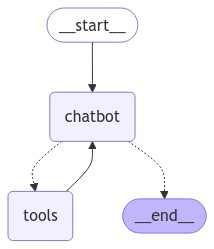

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
user_input="Hi there!, My name is Shubham Mishra"

events=graph.stream(
     {"messages": [("user", user_input)]},stream_mode="values"
)

for event in events:
  event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there!, My name is Shubham Mishra
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_pxxr)
 Call ID: call_pxxr
  Args:
    query: Shubham Mishra
================================= Tool Message =================================
Name: wikipedia

Page: Lisa Mishra
Summary: Lisa Mishra is an American singer, songwriter and actress. She is best known for her reprise version of the song Tareefan in the 2018 Indian film Veere Di Wedding. Since then, she has worked on songs like 'The Wakhra Song' from the 2019 film Judgementall Hai Kya, 'Nadaaniyaan' in the film The Sky Is Pink and also the party-anthem 'Chandigarh Mein' from Good Newwz. 
Now, with a series of lauded independent singles like ‘Sajna Ve’, ‘Aa Mil’ and ‘Rider’ under her belt, and with the release of her debut full length album 'Sorry, I'm Late' that she has composed and written - Lisa Mis

In [ ]:
user_input="Hi there!, My name is John"

events=graph.stream(
     {"messages": [("user", user_input)]},stream_mode="values"
)

for event in events:
  event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there!, My name is John
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_4z6z)
 Call ID: call_4z6z
  Args:
    query: John
================================= Tool Message =================================
Name: wikipedia

No good Wikipedia Search Result was found
================================== Ai Message ==================================

It seems like there isn't much information about "John" on Wikipedia.  Could you tell me more about what you'd like to know?


In [46]:
from IPython.display import Markdown
user_input="Hi there!, My name is John"

events=graph.stream(
     {"messages": [("user", user_input)]},stream_mode="values"
)

for event in events:
  ai_message = event["messages"][-1].content
  display(Markdown(f"**AI:** {ai_message}"))


**AI:** Hi there!, My name is John

**AI:** 

**AI:** No good Wikipedia Search Result was found

**AI:** Hi John, it's nice to meet you! 


In [ ]:
user_input = "what is RLHF."

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]},stream_mode="values"
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

what is RLHF.
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_7a9n)
 Call ID: call_7a9n
  Args:
    query: RLHF
================================= Tool Message =================================
Name: wikipedia

Page: Reinforcement learning from human feedback
Summary: In machine learning, reinforcement learning from human feedback (RLHF) is a technique to align an intelligent agent with human preferences. It involves training a reward model to represent preferences, which can then be used to train other models through reinforcement learning.
In classical reinforcement learning, an intelligent agent's goal is to learn a function that guides its behavior, called a policy. This function is iteratively updated to maximize rewards based on the agent's task performance. However, explicitly defining a reward function that accurately approximates human

In [ ]:
from IPython.display import Markdown

user_input = "what is RLHF."


events = graph.stream(
    {"messages": [("user", user_input)]},stream_mode="values"
)
for event in events:
    ai_message = event["messages"][-1].content
    display(Markdown(f"**AI:** {ai_message}"))

**AI:** what is RLHF.

**AI:** 

**AI:** Page: Reinforcement learning from human feedback
Summary: In machine learning, reinforcement learning from human feedback (RLHF) is a technique to align an intelligent agent with human preferences. It involves training a reward model to represent preferences, which can then be used to train other models through reinforcement learning.
In classical reinforcement learning, an intelligent agent's goal is to learn a function that guides its behavior, called a policy. This function is iteratively updated to maximize rewards based on the agent's task performance. However, explicitly defining a reward function that accurately approximates human preferences is challenging. Therefore, RLHF seeks to train a "reward model" directly from human feedback. The reward model is first trained in a supervised manner to predict if a response to a given prompt is good (high reward) or bad (low reward) based on ranking data collected from human annotators or other pre-trained models. This model then serves as a reward function to improve an agent's policy through an optimization algorithm like proximal policy optimization.
RLHF has applications in various domains in machine learning, including natural language processing tasks such as text summarization and conversational agents, computer vision tasks like text-to-image models, and the development of video game bots. While RLHF is an effective method of training models to act better in accordance with human preferences, it also faces challenges due to the way the human preference data is collected. Though RLHF does not require massive amounts of data to improve performance, sourcing high-quality preference data is still an expensive process. Furthermore, if the data is not carefully collected from a representative sample, the resulting model may exhibit unwanted biases.



**AI:** Reinforcement Learning from Human Feedback (RLHF) is a technique used in machine learning to align an AI agent's behavior with human preferences. 
